In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

Choose four cryptocurrencies which occupy top four cap in Market

In [2]:
cc_list = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD']
volume=['BTC-Billion','ETH-Billion','XRP-Billion','BCH-Billion']
percent=['BTC-%Change','ETH-%Change','XRP-%Change','BCH-%Change']

In [3]:
#end = datetime.today()
end=datetime.utcnow()
start = datetime(end.year-1,end.month,end.day)

In [4]:
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
XRP = pdr.DataReader('XRP-USD','yahoo',start,end)
BCH = pdr.DataReader('BCH-USD','yahoo',start,end)

In [5]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-16,5676.540039,5487.870117,5647.500000,5586.270020,397196182,5586.270020
2018-11-17,5602.009766,5524.700195,5586.970215,5568.939941,164182152,5568.939941
2018-11-18,5701.350098,5567.950195,5567.950195,5615.259766,233409182,5615.259766
2018-11-19,5615.979980,4757.009766,5615.259766,4809.620117,1072037780,4809.620117
2018-11-20,4953.560059,4168.250000,4809.620117,4431.049805,1295832448,4431.049805


In [6]:
ls=[BTC,ETH,XRP,BCH]

In [7]:
style=['r','g','b','c']

In [8]:
def compare(name,title,mark=None):
    j=1
    for i in range(len(ls)):
        plt.subplot(4,1,j)
        ls[i][name].plot(legend = True, figsize=(12,16),color=style[i],marker=mark)
        plt.title(title[i])
        j+=1

## The change in market price and volume over time ##

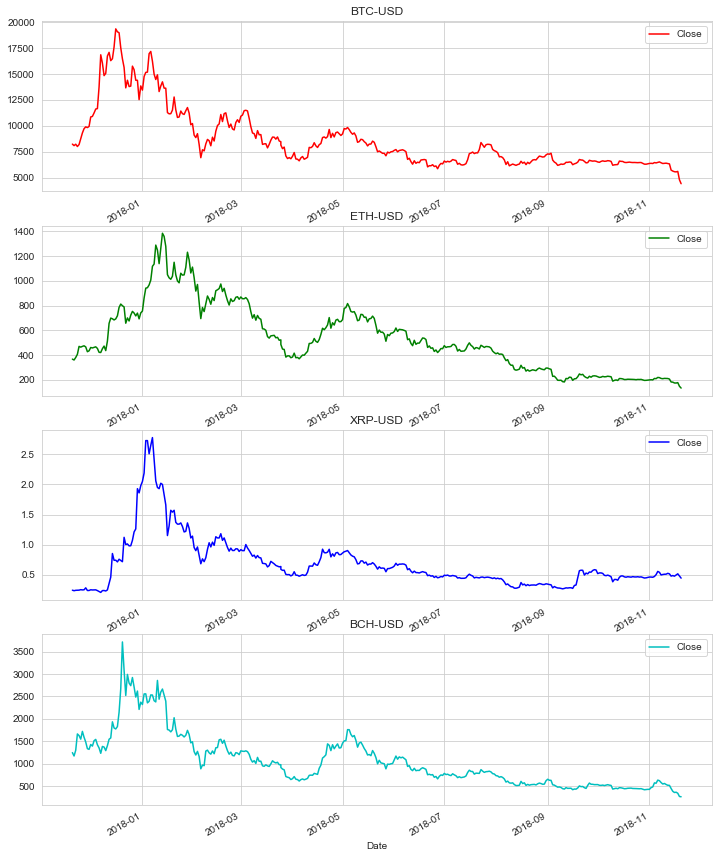

In [9]:
compare('Close',title=cc_list)

     The peak of cryptocurrency market is bewtween Nov, 2017 to Jan, 2018

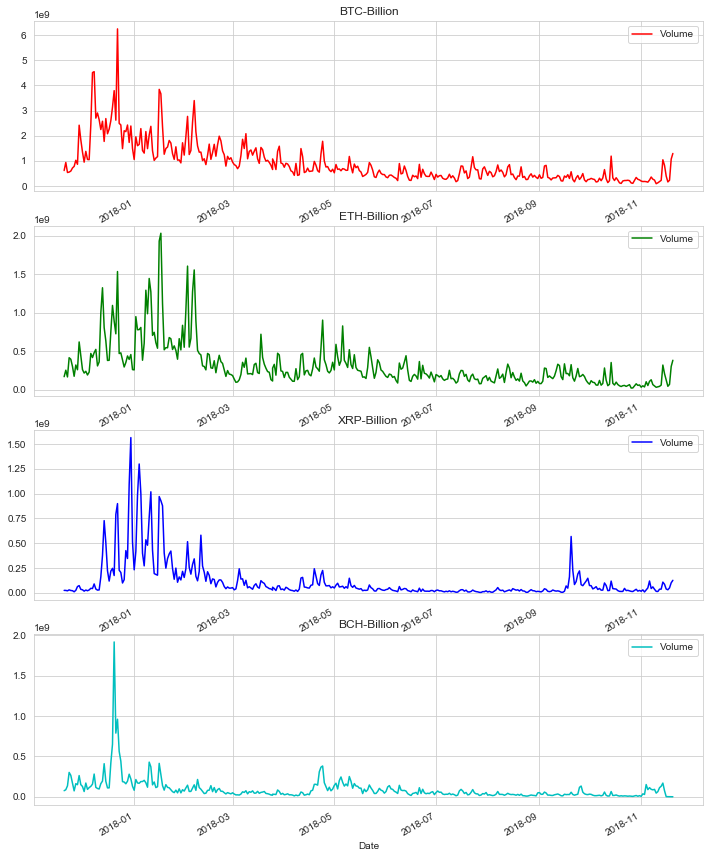

In [10]:
compare('Volume',title=volume)

         trade volume seems has more oscillations compare to price 

## Moving Average 

    Useing MA to elimenate short term fluctuation and seize long term trend

In [11]:
ma_days = [10,20,50]
for i in range(len(ls)):
    for ma in ma_days:
        column_name = "MA %s days" %(str(ma))
        ls[i][column_name] = ls[i]['Close'].rolling(window=ma,center=False).mean()

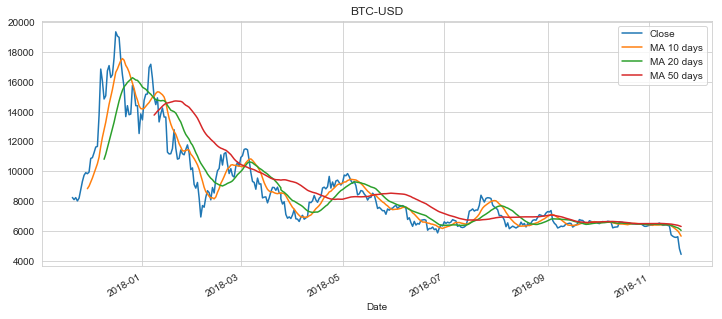

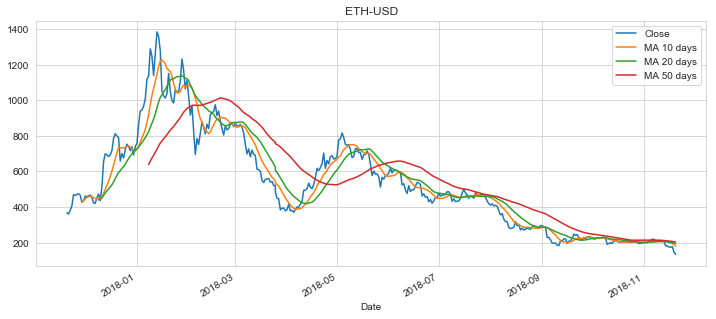

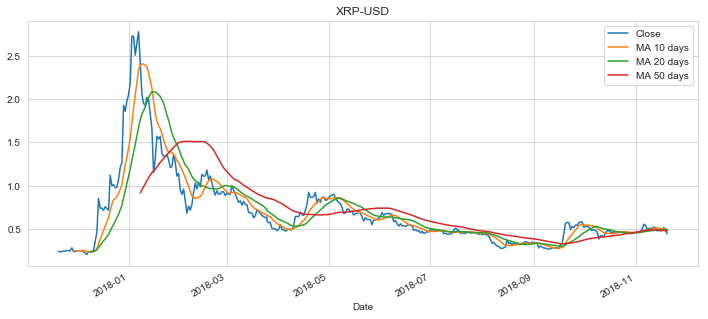

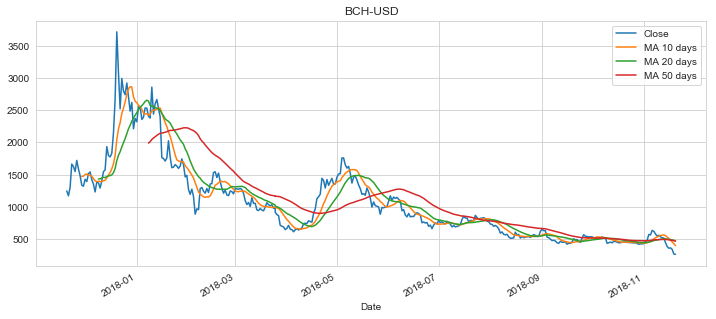

In [12]:
y=1
for i in range(len(ls)):
    ls[i][['Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend = True,figsize=(12,5))
    plt.title(cc_list[i])
    y+=1

## The daily return

           daily return shows the profit gain from different cryptocurrency in each day base on % 
           give a glimpse of valotile of different crypto

In [13]:
chge=None
for i in range(len(ls)):
    temp=ls[i]['Close'].pct_change()
    ls[i]['Daily Return']=temp
    temp=pd.DataFrame(temp)
    if chge is None:
        chge=temp
    else:
        chge=pd.concat([chge, temp], axis=1)    

In [14]:
chge.columns=percent

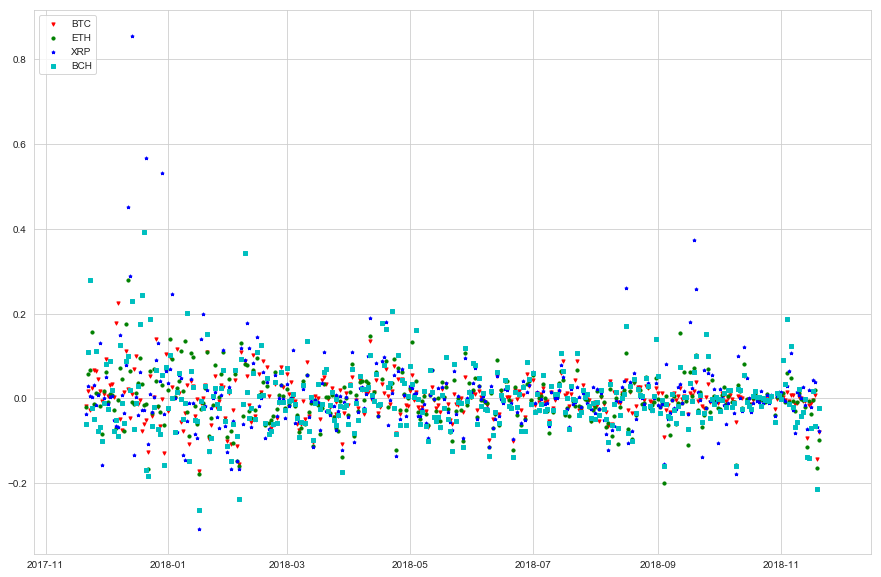

In [15]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax1.scatter(chge.index,chge['BTC-%Change'].values, s=10, c='r', marker="v", label='BTC')
ax1.scatter(chge.index,chge['ETH-%Change'].values, s=10, c='g', marker="o", label='ETH')
ax1.scatter(chge.index,chge['XRP-%Change'].values, s=10, c='b', marker="*", label='XRP')
ax1.scatter(chge.index,chge['BCH-%Change'].values, s=10, c='c', marker="s", label='BCH')
plt.legend(loc='upper left');

## The correlation between daily returns of different cryptocurrency

In [16]:
close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Close']

In [17]:
chge.head()

,BTC-%Change,ETH-%Change,XRP-%Change,BCH-%Change
Date,,,,
2017-11-20,NaN,NaN,NaN,NaN
2017-11-21,-0.017553,-0.019553,-0.036575,-0.060533
2017-11-22,0.016615,0.056363,0.028904,0.110026
2017-11-23,-0.026855,0.067561,0.006289,0.279982
2017-11-24,0.023385,0.157070,0.004167,-0.022356


/Users/jinyao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


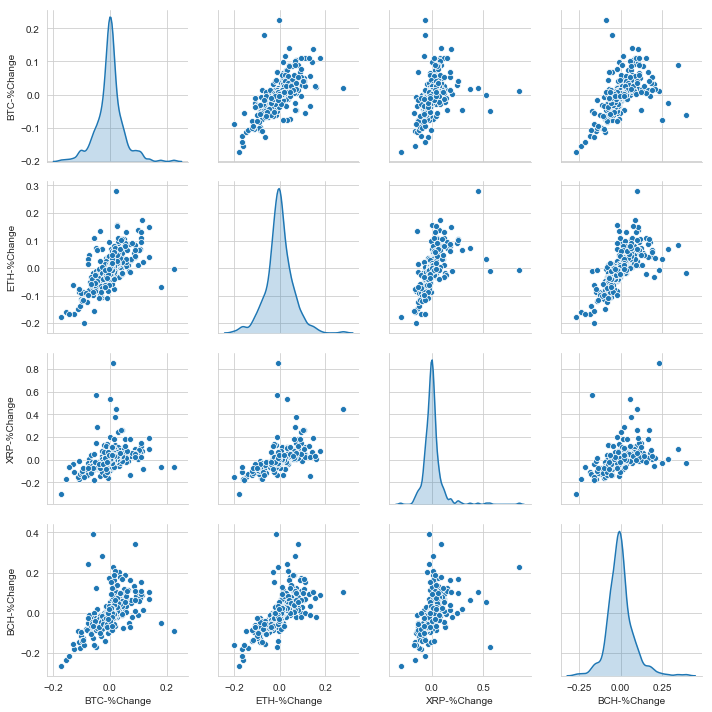

In [18]:
sns.pairplot(chge.dropna(),diag_kind='kde')

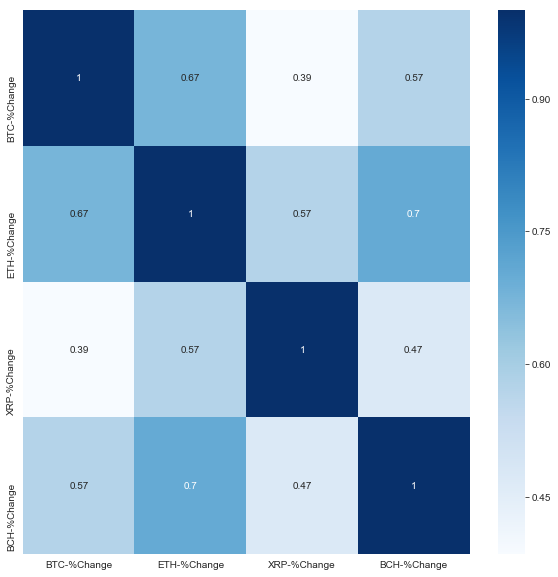

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = chge.dropna().corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues',ax=ax)

        ETH/BCH, ETH/BTC shows more correlation, prove after

## Exchanges

In [20]:
import ccxt
import time

In [21]:
def exchanges():
    exchs=ccxt.exchanges
    ls=[]
    for i in exchs:
        exch = getattr(ccxt, i.strip())()
        ID=exch.id
        name=exch.name
        countries=exch.countries
        try:
            exch.load_markets()
        except:
            symbols=exch.symbols
        symbols=exch.symbols
        if symbols is not None:
            num=len(symbols)
        else:
            num=0
        tup=(ID,name,countries,symbols,num)
        ls.append(tup)
    return pd.DataFrame(ls)

In [113]:
exchs=exchanges()

In [114]:
len(exchs)

133

In [23]:
exchs.columns=["ID","Name","Countries","Symbols","# of Symbols"]

In [24]:
exchs_sort=exchs.sort_values("# of Symbols", ascending=False)

In [25]:
exchs_sort.head()

,ID,Name,Countries,Symbols,# of Symbols
56,coinmarketcap,CoinMarketCap,[US],"[$$$/AUD, $$$/BRL, $$$/BTC, $$$/CAD, $$$/CHF, ...",36666
129,yobit,YoBit,[RU],"[$PAC/BTC, $PAC/DOGE, $PAC/ETH, $PAC/RUB, $PAC...",7941
65,cryptopia,Cryptopia,[NZ],"[$$$/BTC, $$$/DOGE, $$$/LTC, $PAC/BTC, $PAC/DO...",1550
82,hitbtc,HitBTC,[HK],"[1ST/BTC, 1ST/ETH, ABA/BTC, ABA/ETH, ABA/USDT,...",928
83,hitbtc2,HitBTC v2,[HK],"[1ST/BTC, 1ST/ETH, ABA/BTC, ABA/ETH, ABA/USDT,...",928


## popular Symbols( trading pair) and Currency

In [26]:
pairs=exchs["Symbols"].dropna().values

In [27]:
from functools import reduce

In [28]:
def unpack(*li):
    dic={}
    p = reduce(lambda x, y: x+y,li)
    for i in p:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    return dic

In [29]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

In [30]:
from wordcloud import WordCloud
from PIL import Image
import requests

In [95]:
def word_cloud(li,wid,hei,size):
    dic=unpack(*li)
    wc=WordCloud(background_color="white",width=wid, height=1000, margin=2,mask=mask,max_font_size=50).generate_from_frequencies(dic)
    fig1, ax1 = plt.subplots(figsize=size)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

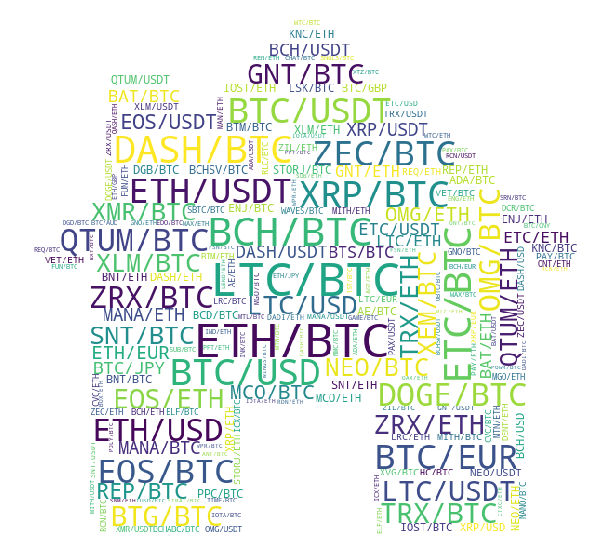

In [96]:
word_cloud(pairs,1000,1000,(10,10))

        trading pair based on BTC seems popular, for fiat money USD is welcome

In [83]:
top_exchanges=['OKEX','Binance','Bitfinex']

In [84]:
top=exchs.loc[exchs['Name'].isin(top_exchanges)]

In [85]:
top.head()

,ID,Name,Countries,Symbols,# of Symbols
8,binance,Binance,[JP],"[ADA/BNB, ADA/BTC, ADA/ETH, ADA/USDT, ADX/BNB,...",408
12,bitfinex,Bitfinex,[VG],"[ABYSS/ETH, ABYSS/USDT, AGI/BTC, AGI/ETH, AGI/...",322
109,okex,OKEX,"[CN, US]","[1ST/USDT, AAC/BTC, AAC/ETH, AAC/USDT, ABL/BTC...",522


In [116]:
ok= getattr(ccxt, 'okex')()
binance=getattr(ccxt, 'binance')()
bitfinex=getattr(ccxt, 'bitfinex')()

In [106]:
x=ok.loadMarkets()
y=binance.loadMarkets()
z=bitfinex.loadMarkets()

In [101]:
def break_pairs(li):
    pair_ls=[]
    for x in li:
        temp=x.split('/')
        pair_ls.append(temp)
    return pair_ls

### bianance

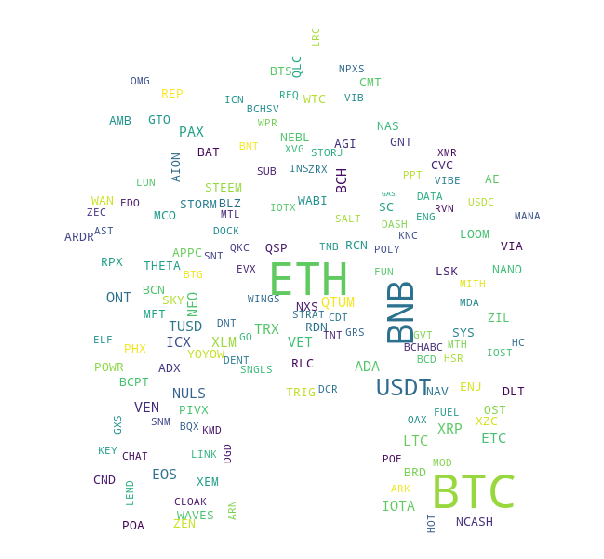

In [108]:
bi=break_pairs(binance.symbols)
word_cloud(bi,500,500,(10,10))

### OKEX

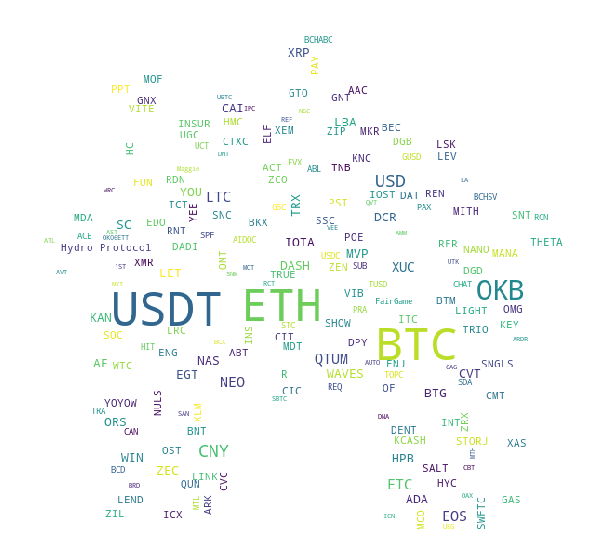

In [107]:
ok=break_pairs(ok.symbols)
word_cloud(ok,500,500,(10,10))

### Bitfinex

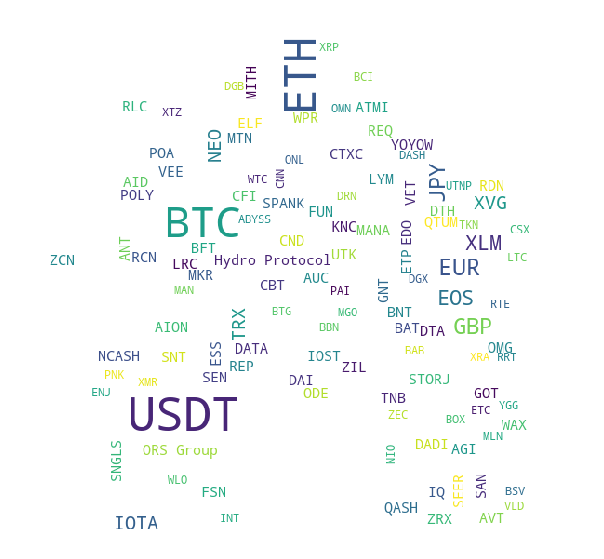

In [109]:
bif=break_pairs(bitfinex.symbols)
word_cloud(bif,500,500,(10,10))

## Cryptocurrency Market Worldwide

In [34]:
nation=exchs['Countries'].dropna().values

In [35]:
y=unpack(*nation)

In [36]:
nation=pd.DataFrame.from_dict(y,orient='index')

In [37]:
nation.reset_index(level=0,inplace=True)

In [38]:
nation.columns=["alpha-2",'number']

In [39]:
all_nation=pd.read_csv("all.csv")

In [40]:
part_nation=all_nation[['name','alpha-2','alpha-3']]

In [41]:
df=pd.DataFrame.merge(nation,part_nation,on="alpha-2",how='inner')

In [42]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [43]:
init_notebook_mode(connected='True')
data = [ dict(
        type = 'choropleth',
        locations = df['alpha-3'],
        z = df['number'],
        text = df['name'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = '# of exchanges'),
      ) ]
layout = dict(
    title = 'Global Exchanges Distribution',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

     ### Asia occupies large # of exchanges, market seems heat there

In [110]:
def get_ohlv(symbol,interval,exch):
    #begin=datetime.utcnow()
    begin=datetime.today()
    date=datetime(begin.year,begin.month-1,begin.day)
    data=exch.fetch_ohlcv(symbol,interval,since=exch.parse8601(str(date)))
    data = np.array(data)
    data = data.transpose()
    data = {"time": data[0], "Open":data[1], "High":data[2], "Low":data[3], "Close":data[4], "Volume":data[5]}
    data = pd.DataFrame(data)
    data["time"] = data["time"].apply(lambda x: datetime.fromtimestamp(x//1000))
    df = data.set_index("time")
    trace = go.Ohlc(x=df.index,
                open=df.Open,
                high=df.High,
                low=df.Low,
                close=df.Close)
    layout=go.Layout(title=symbol, xaxis={'title':'Date','rangeslider':{
         'visible': False}}, yaxis={'title':'Price'})
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='OHLC without Rangeslider')

## ohlc chart

In [117]:
pair1='BTC/USDT'
pair2='ETH/USDT'
pair3='XRP/USDT'
pair4='BCH/USDT'
get_ohlv(pair1,'1d',binance)
get_ohlv(pair2,'1d',ok)
get_ohlv(pair3,'1d',bitfinex)
get_ohlv(pair4,'1d',binance)

    One month ohlc chart data from differemt exchanges until today. Market plup down lask week beacuse big event(BCH hard fork). XRP seems relative stable. prove the correlation find out before. Blank part in BCH beacuse exchange freeze BCH trading during hard fork